# Component X
This notebook will explore the SCANIA Component X dataset.

We start by exploring the dataset. Next we will transform the data to remove any missing values, add and remvoe features. Finally a model that will predict the maintenance needs for the X-component.

[Paper at arXiv](https://arxiv.org/abs/2401.15199)

[Dataset can be downloaded here](https://stockholmuniversity.app.box.com/s/anmg5k93pux5p6decqzzwokp9vuzmdkh)

Place the data files in the folder /data/

In [75]:
#Includes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
#Read the raw data
#Train data
tteTrain = pd.read_csv('../data/train_tte.csv')
specificationsTrain = pd.read_csv('../data/train_specifications.csv')
readoutsTrain = pd.read_csv('../data/train_operational_readouts.csv')


#Validation data
labelsValidation = pd.read_csv('../data/validation_labels.csv')
specificationsValidation = pd.read_csv('../data/validation_specifications.csv')
readoutsValidation = pd.read_csv('../data/validation_operational_readouts.csv')

#Test data
specificationsTest = pd.read_csv('../data/test_specifications.csv')
readoutsTest = pd.read_csv('../data/test_operational_readouts.csv')
#No labels for test data yet


In [77]:
#See what is in the data
tteTrain.head()

,vehicle_id,length_of_study_time_step,in_study_repair
0,0,510.0,0
1,2,281.8,0
2,3,293.4,0
3,4,210.0,0
4,5,360.4,0


In [78]:
specificationsTrain.head()

,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,2,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
2,3,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
3,4,Cat0,Cat0,Cat2,Cat1,Cat0,Cat0,Cat0,Cat1
4,5,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1


In [79]:
readoutsTrain.head()

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,0,11.2,167985.0,10787.0,7413813.0,2296.0,4110.0,1296420.0,1628265.0,630345.0,...,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0
1,0,11.4,167985.0,10787.0,7413813.0,2296.0,4111.0,1302855.0,1628265.0,630345.0,...,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0
2,0,19.6,331635.0,14525.0,13683604.0,2600.0,NaN,NaN,NaN,NaN,...,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0
3,0,20.2,354975.0,15015.0,14540449.0,2616.0,NaN,NaN,NaN,NaN,...,150565.0,19832.0,2522.0,12.0,1444.0,211688.0,318901.0,107745.0,19406.0,453.0
4,0,21.0,365550.0,15295.0,14966985.0,2720.0,NaN,NaN,NaN,NaN,...,155913.0,20573.0,2562.0,12.0,1445.0,213956.0,323997.0,109514.0,19535.0,454.0


In [80]:
readoutsTrain.columns


Index(['vehicle_id', 'time_step', '171_0', '666_0', '427_0', '837_0', '167_0',
       '167_1', '167_2', '167_3',
       ...
       '397_26', '397_27', '397_28', '397_29', '397_30', '397_31', '397_32',
       '397_33', '397_34', '397_35'],
      dtype='object', length=107)

In [81]:
#Check the shape of the data
readoutsTrain.shape

(1122452, 107)

In [82]:
readoutsTrain.describe()

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
count,1.122452e+06,1.122452e+06,1.122452e+06,1.122412e+06,1.116047e+06,1.122413e+06,1.119590e+06,1.119590e+06,1.119590e+06,1.119590e+06,...,1.121842e+06,1.121842e+06,1.121842e+06,1.121842e+06,1.121842e+06,1.121842e+06,1.121842e+06,1.121842e+06,1.121842e+06,1.121842e+06
mean,1.563501e+04,1.426336e+02,3.432285e+06,1.220519e+05,1.297269e+08,4.432735e+04,1.231484e+04,6.578556e+06,1.647673e+07,1.348033e+07,...,1.521964e+06,1.536442e+05,1.367280e+06,2.570485e+03,1.823138e+04,6.542113e+05,1.526108e+06,4.824174e+05,1.583489e+05,2.484948e+03
std,9.802149e+03,9.529169e+01,2.766660e+06,1.441444e+05,1.005308e+08,7.982317e+04,4.523900e+04,5.408065e+06,1.481707e+07,1.463525e+07,...,1.503821e+06,4.406305e+05,2.125067e+08,2.534584e+05,2.544681e+05,9.304021e+05,1.865814e+06,6.119438e+05,3.397372e+05,1.059174e+04
min,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,6.050000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.726000e+03,6.640000e+01,1.288320e+06,2.970375e+04,5.180904e+07,2.848000e+03,4.320000e+02,2.640738e+06,6.241352e+06,4.709285e+06,...,4.536612e+05,3.865800e+04,5.399000e+03,3.600000e+01,4.855250e+03,1.513380e+05,3.607022e+05,1.050340e+05,1.743900e+04,6.400000e+01
50%,1.578300e+04,1.278000e+02,2.781472e+06,7.645500e+04,1.080906e+08,1.575500e+04,3.570000e+03,5.276156e+06,1.275505e+07,9.788470e+06,...,1.082700e+06,8.885200e+04,1.437400e+04,1.320000e+02,1.092700e+04,3.848580e+05,9.473010e+05,2.789230e+05,5.457550e+04,3.060000e+02
75%,2.354200e+04,2.060000e+02,4.949614e+06,1.620980e+05,1.853690e+08,5.212300e+04,1.299600e+04,9.018105e+06,2.237455e+07,1.747985e+07,...,2.136832e+06,1.806940e+05,3.534500e+04,4.680000e+02,2.038800e+04,8.194420e+05,2.016070e+06,6.186420e+05,1.511848e+05,1.366000e+03
max,3.364300e+04,5.074000e+02,3.048960e+07,5.886459e+06,1.046455e+09,6.524252e+06,7.526577e+06,6.723617e+07,3.032439e+08,4.094330e+08,...,3.496772e+07,5.059165e+07,3.422587e+10,3.355872e+07,3.358788e+07,3.402722e+07,3.475135e+07,8.870681e+06,8.707186e+06,5.869580e+05


In [83]:
#Check how many vehicles are in the data
readoutsTrain['vehicle_id'].unique().shape

(23550,)

# Variable structure

Histogram variables use the following indexing format: variableid_binindex. Where the "variableid"
represents the ID of an anonymized variable or feature, and "binindex" shows the bin numbers. As an example, the variable
with "variableid" 167 is a multi-dimensional histogram that has ten bins, "167_0", "167_1",..., and "167_9".

In summary, six out of 14 variables are organized into six histograms with variable IDs: "167", "272", "291", "158", "459",
and "397," with 10, 10, 11, 10, 20, and 36 bins, respectively.

Moreover, the eight rest of the variables
named "171_0", "666_0", "427_0", "837_0", "309_0", "835_0", "370_0", "100_0" are numerical counters. These features are
accumulative and are suitable for the representation of trends over time.


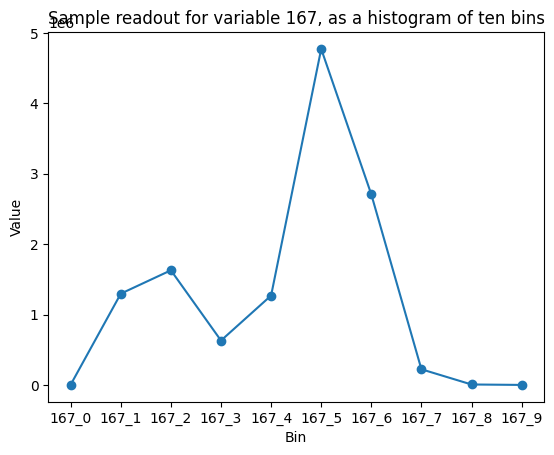

In [84]:
cols = ['167_0', '167_1', '167_2', '167_3', '167_4', '167_5', '167_6', '167_7', '167_8', '167_9']
#Take the first row of the data
y = readoutsTrain[cols].iloc[0]
#Plot the data
plt.plot(y, 'o-')
plt.xlabel('Bin')
plt.ylabel('Value')
plt.title('Sample readout for variable 167, as a histogram of ten bins');





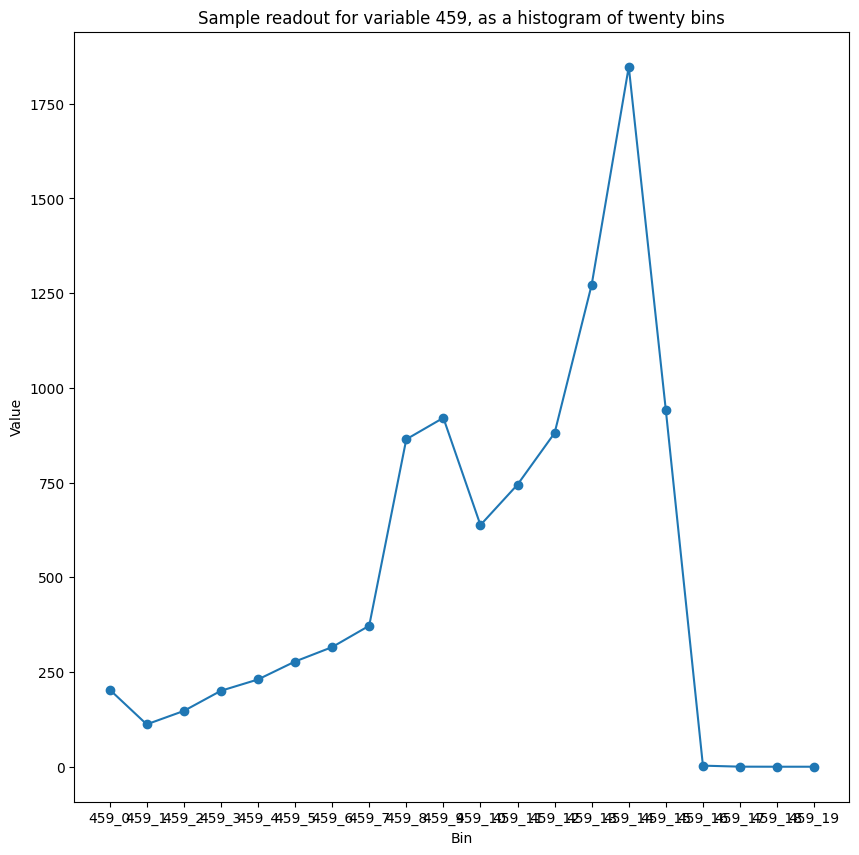

In [85]:
cols = ['459_0', '459_1', '459_2', '459_3', '459_4', '459_5', '459_6', '459_7', '459_8', '459_9', '459_10', '459_11', '459_12', '459_13', '459_14', '459_15', '459_16', '459_17', '459_18', '459_19']
#Take the first row of the data
y = readoutsTrain[cols].iloc[0]
#Plot the data
plt.figure(figsize = (10,10))
plt.plot(y, 'o-')
plt.xlabel('Bin')
plt.ylabel('Value')
plt.title('Sample readout for variable 459, as a histogram of twenty bins');

# Non histogram features

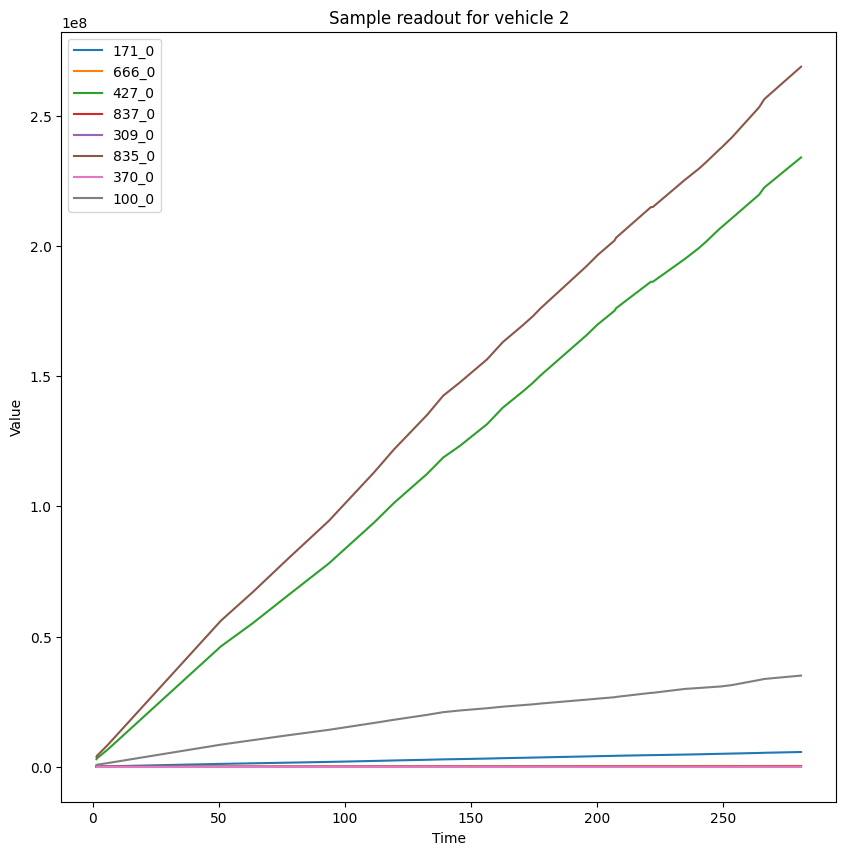

In [86]:
cols =  ['171_0', '666_0', '427_0', '837_0', '309_0', '835_0', '370_0', '100_0']
vechicleId = 2
x = readoutsTrain[readoutsTrain['vehicle_id'] == vechicleId]['time_step'].to_numpy()
y = readoutsTrain[readoutsTrain['vehicle_id'] == vechicleId][cols].to_numpy()
plt.figure(figsize = (10,10))
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(cols)
plt.title('Sample readout for vehicle 2');

# Correlation of non-histogram features in the training set
See what the correlations of the non-histogram features are, for the entire training set.

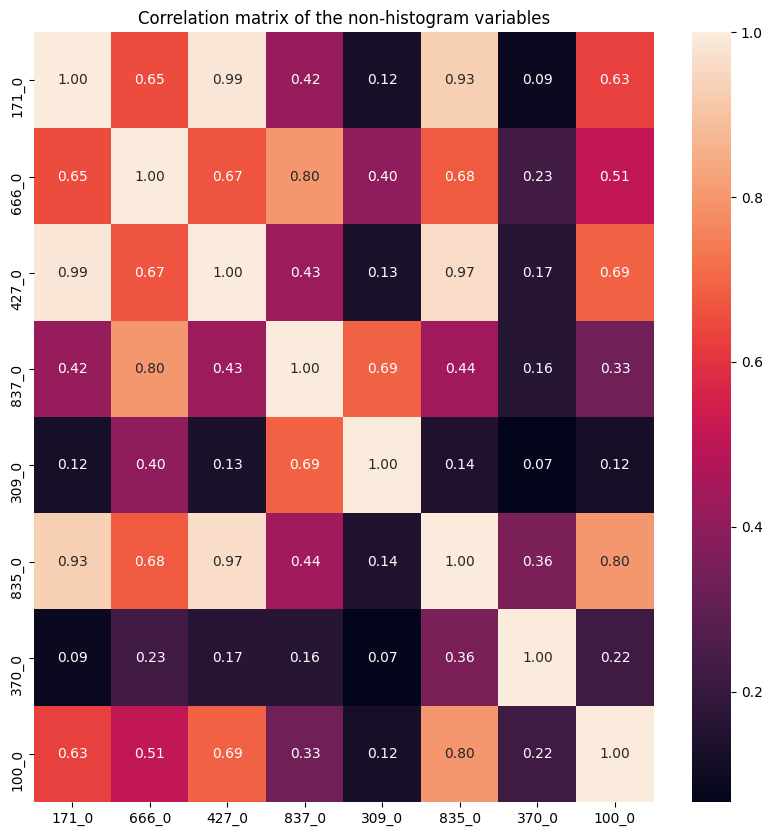

In [87]:
cols =  ['171_0', '666_0', '427_0', '837_0', '309_0', '835_0', '370_0', '100_0']

#Calculate the correlation matrix
corr = readoutsTrain[cols].corr()

#Plot the correlation matrix
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f")

#Add title
plt.title('Correlation matrix of the non-histogram variables');

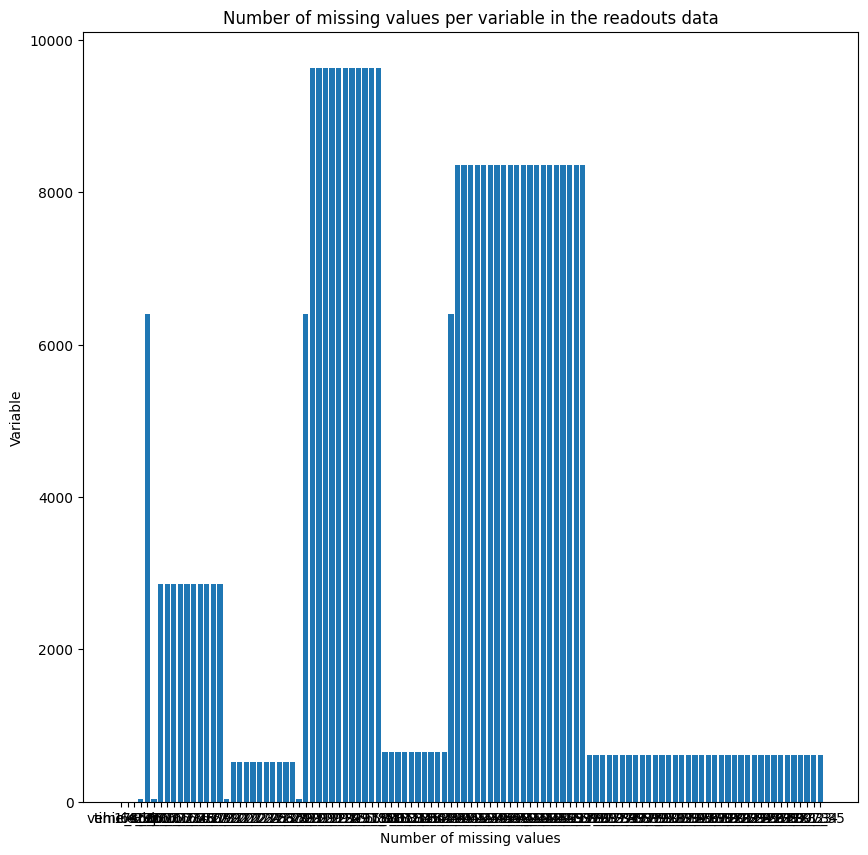

In [88]:
# Check the number of missing values per column
y = readoutsTrain.isnull().sum()
plt.figure(figsize = (10,10))
plt.bar(y.index, y)
plt.xlabel('Number of missing values')
plt.ylabel('Variable')
plt.title('Number of missing values per variable in the readouts data');


# Visualize the file train_tte.csv

The file with the name "train_tte.csv" contains the repair records of Component X collected from each vehicle, indicating
the time_to_event (tte), i.e., the replacement time for Component X during the study period. This data file includes 23550
number of rows and two columns: "length_of_study_time_step" and "in_study_repair," where the former indicates the number
of operation time steps after Component X started working. The latter is the class label, where it’s set to 1 if Component X was
repaired at the time equal to its corresponding length_of_study_time_step, or it can take the value of zero in case no failure or
repair event occurs during the first length_of_study_time_step of operation. It is good to mention that the "train_tte.csv" data
is imbalanced with 21278 occurrences of label 0 and 2272 instances of label 1

In [89]:
tteTrain.tail()

,vehicle_id,length_of_study_time_step,in_study_repair
23545,33639,137.4,0
23546,33640,124.6,0
23547,33641,123.0,0
23548,33642,126.6,0
23549,33643,130.2,0


In [90]:
#Check the number of data points in the Time To Event data
tteTrain.shape

(23550, 3)

In [91]:
tteTrain.describe()

,vehicle_id,length_of_study_time_step,in_study_repair
count,23550.000000,23550.000000,23550.000000
mean,16851.663185,240.349019,0.096476
std,9714.309420,88.782437,0.295249
min,0.000000,73.400000,0.000000
25%,8468.250000,163.800000,0.000000
50%,16882.500000,218.200000,0.000000
75%,25247.750000,312.000000,0.000000
max,33643.000000,510.000000,1.000000


In [92]:
#Check if there are nulls in the data
tteTrain.isnull().sum()

vehicle_id                   0
length_of_study_time_step    0
in_study_repair              0
dtype: int64

In [93]:
#Count the number of unique vehicles
tteTrain['vehicle_id'].unique().shape

(23550,)

<AxesSubplot:>

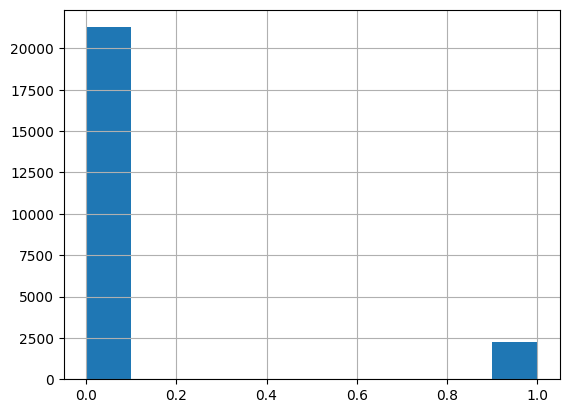

In [94]:
#Check the distribution of events, if the vechicle is 1, then a failure happened, and 0 no failure happened
tteTrain['in_study_repair'].hist()

Text(0, 0.5, 'Frequency')

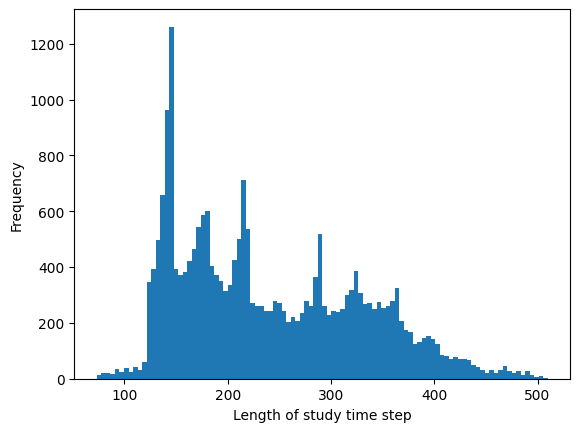

In [95]:
plt.hist(tteTrain['length_of_study_time_step'], bins = 100);
plt.xlabel('Length of study time step')
plt.ylabel('Frequency')



# The file train_specifications.csv

The last file in the training set is called "train_specifications.csv," which contains information about the specifications of the
vehicles, such as their engine type and wheel configuration. In total, there are 23550 observations and eight categorical features
for all vehicles. The features in train_specifications.csv are anonymized, each can take categories in Cat0, Cat1, ..., Cat8. 

In [96]:
specificationsTrain.head()

,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,2,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
2,3,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
3,4,Cat0,Cat0,Cat2,Cat1,Cat0,Cat0,Cat0,Cat1
4,5,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1


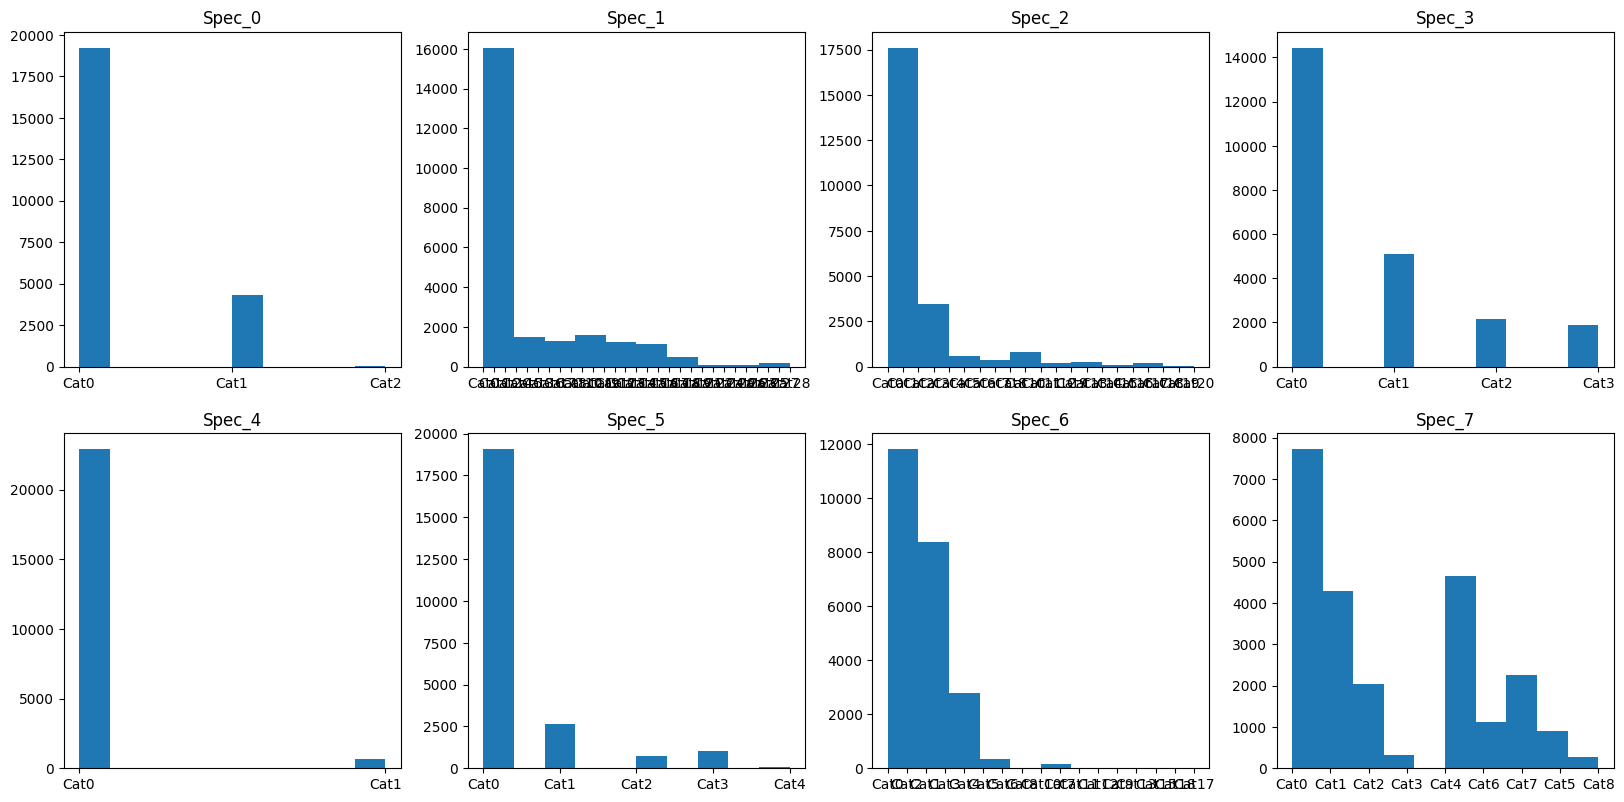

In [97]:
# For each column create a subplot with the histogram of the data
plt.figure(figsize = (20,20))
for i, col in enumerate(specificationsTrain.columns[1:]):
    plt.subplot(4, 4, i+1)
    plt.hist(specificationsTrain[col])
    plt.title(col)

In [98]:
#Check for nans
specificationsTrain.isnull().sum()

vehicle_id    0
Spec_0        0
Spec_1        0
Spec_2        0
Spec_3        0
Spec_4        0
Spec_5        0
Spec_6        0
Spec_7        0
dtype: int64

In [99]:
tteTrain[tteTrain['in_study_repair'] == 1].head()

,vehicle_id,length_of_study_time_step,in_study_repair
10,22,190.8,1
13,27,354.6,1
15,29,425.2,1
34,52,235.0,1
40,61,293.0,1


In [100]:
tteTrain.tail()

,vehicle_id,length_of_study_time_step,in_study_repair
23545,33639,137.4,0
23546,33640,124.6,0
23547,33641,123.0,0
23548,33642,126.6,0
23549,33643,130.2,0


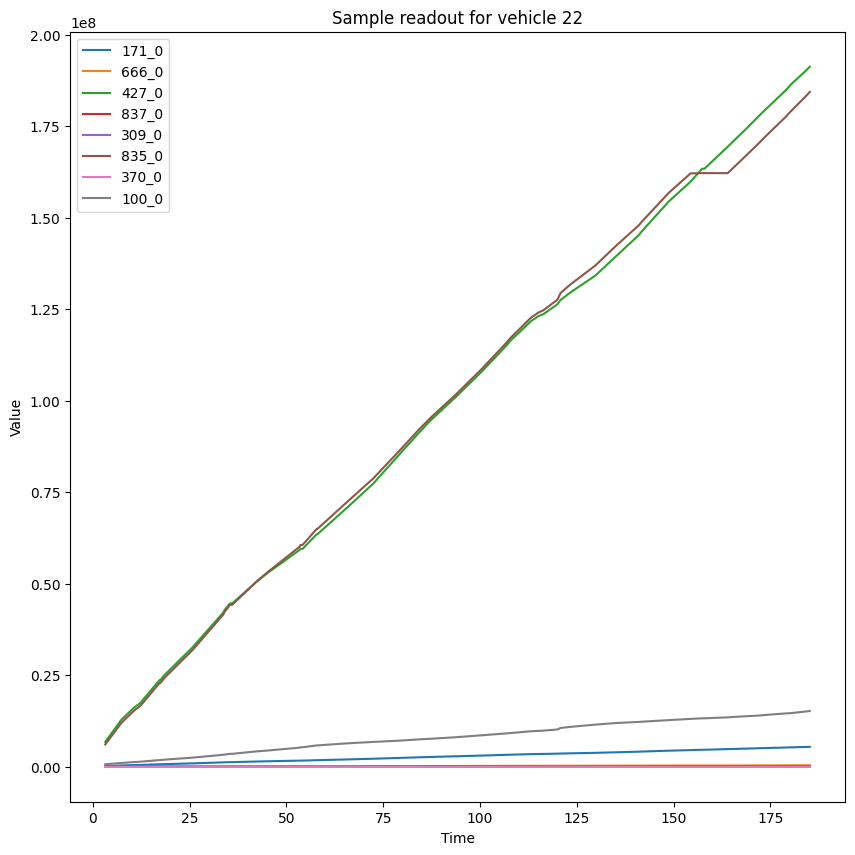

In [101]:
cols =  ['171_0', '666_0', '427_0', '837_0', '309_0', '835_0', '370_0', '100_0']
vechicleId = 22
x = readoutsTrain[readoutsTrain['vehicle_id'] == vechicleId]['time_step'].to_numpy()
y = readoutsTrain[readoutsTrain['vehicle_id'] == vechicleId][cols].to_numpy()
plt.figure(figsize = (10,10))
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(cols)
plt.title(f'Sample readout for vehicle {vechicleId}');

In [102]:
readoutsTrain[readoutsTrain['vehicle_id'] == vechicleId]

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
545,22,3.2,179550.0,4460.0,6791004.0,680.0,NaN,NaN,NaN,NaN,...,38832.0,893.0,76.0,12.0,200.0,15180.0,32393.0,2325.0,321.0,20.0
546,22,7.4,355095.0,16955.0,12882265.0,3504.0,NaN,NaN,NaN,NaN,...,126917.0,2941.0,404.0,20.0,296.0,55100.0,141842.0,12377.0,1957.0,64.0
547,22,10.8,452700.0,23437.0,16294157.0,5856.0,NaN,NaN,NaN,NaN,...,175125.0,4102.0,593.0,28.0,340.0,73064.0,203347.0,17577.0,3289.0,248.0
548,22,12.2,483285.0,24978.0,17353810.0,6416.0,NaN,NaN,NaN,NaN,...,187982.0,4535.0,709.0,44.0,404.0,77956.0,216100.0,18629.0,3365.0,268.0
549,22,17.2,663660.0,37683.0,23636999.0,10664.0,NaN,NaN,NaN,NaN,...,271407.0,6812.0,1269.0,44.0,628.0,113196.0,337733.0,29705.0,4998.0,325.0
550,22,17.4,663660.0,37683.0,23636999.0,10665.0,NaN,NaN,NaN,NaN,...,271407.0,6812.0,1270.0,44.0,628.0,113196.0,337733.0,29706.0,4999.0,325.0
551,22,18.6,706320.0,40315.0,25157771.0,11449.0,NaN,NaN,NaN,NaN,...,288344.0,7073.0,1318.0,44.0,660.0,120728.0,359817.0,31138.0,5235.0,326.0
552,22,25.8,920055.0,53728.0,32682134.0,14225.0,NaN,NaN,NaN,NaN,...,383397.0,9341.0,1662.0,44.0,968.0,156220.0,466257.0,40054.0,6720.0,326.0
553,22,33.6,1184550.0,72873.0,42004634.0,16289.0,NaN,NaN,NaN,NaN,...,528151.0,12389.0,2119.0,52.0,1532.0,208184.0,621841.0,50650.0,7864.0,346.0
554,22,34.0,1206540.0,75099.0,42771521.0,16530.0,NaN,NaN,NaN,NaN,...,543523.0,12647.0,2136.0,52.0,1541.0,215392.0,642770.0,52110.0,8036.0,347.0


# Format of validation labels
The validation_labels.csv file has 5046 rows, which is equal to the number of vehicles contributed to the operational data of the
validation set. It includes a column named class_label, corresponding to the class for the last readout of each vehicle.

The temporal placement of this final simulated readout is categorized into five classes
denoted by 0, 1, 2, 3, 4 where they are related to readouts within a time window of: (more than 48), (48 to 24), (24 to 12), (12
to 6), and (6 to 0) time_step before the failure, respectively.

In [103]:
labelsValidation.head()

,vehicle_id,class_label
0,10,0
1,16,0
2,18,0
3,23,0
4,45,0


In [104]:
labelsValidation['class_label'].value_counts()

class_label
0    4910
4      76
3      30
1      16
2      14
Name: count, dtype: int64

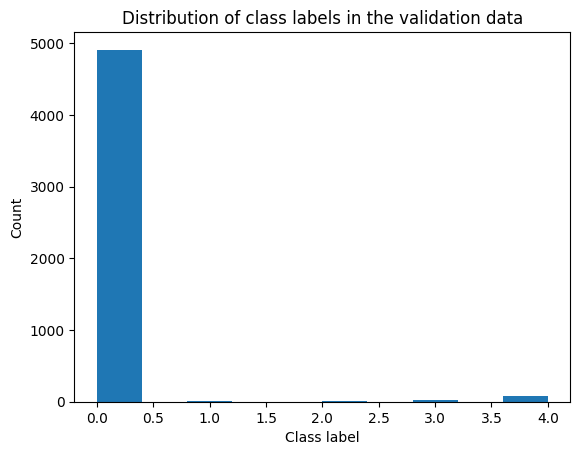

In [105]:
plt.hist(labelsValidation['class_label'])
plt.xlabel('Class label')
plt.ylabel('Count')
plt.title('Distribution of class labels in the validation data');

# Remove NaNs
We need to remove missing values and see if there are any strange values in the dataset.

In [106]:
#First we group by vehicle_id and we will forward fill the last known value.
#Then if the entire column is NaN, we will fill it with the median of the column. 
#If there are still any NaNs we will fill them with 0.

def fill_missing_values(df):
    df = df.groupby('vehicle_id').apply(lambda x: x.ffill(axis=0)) #Forward fill last known value, but only for the same vehicle
    df = df.droplevel('vehicle_id') #Remove multi-index, as we don't want to group by vehicle_id anymore    
    df = df.fillna(df.median()) #Fill with median rather than mean to avoid outliers
    df = df.fillna(0) #Last resort fill with 0
    
    return df

In [107]:
#Clean the data
print('Cleaning the training data')
print(f'Number of missing values before cleaning: {readoutsTrain.isnull().sum().sum()}')
readoutsTrain = fill_missing_values(readoutsTrain)
print(f'Number of missing values after cleaning: {readoutsTrain.isnull().sum().sum()}')
#readoutsValidation = fill_missing_values(readoutsValidation)

Cleaning the training data
Number of missing values before cleaning: 354634
Number of missing values after cleaning: 0


In [108]:
readoutsTrain.head()

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,0,11.2,167985.0,10787.0,7413813.0,2296.0,4110.0,1296420.0,1628265.0,630345.0,...,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0
1,0,11.4,167985.0,10787.0,7413813.0,2296.0,4111.0,1302855.0,1628265.0,630345.0,...,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0
2,0,19.6,331635.0,14525.0,13683604.0,2600.0,4111.0,1302855.0,1628265.0,630345.0,...,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0
3,0,20.2,354975.0,15015.0,14540449.0,2616.0,4111.0,1302855.0,1628265.0,630345.0,...,150565.0,19832.0,2522.0,12.0,1444.0,211688.0,318901.0,107745.0,19406.0,453.0
4,0,21.0,365550.0,15295.0,14966985.0,2720.0,4111.0,1302855.0,1628265.0,630345.0,...,155913.0,20573.0,2562.0,12.0,1445.0,213956.0,323997.0,109514.0,19535.0,454.0


# Resample the rows
The samples in the dataset are sampled at random intervals. In order to normalize the input we need to resample them, so that we have say 1 hour between each row. Then we can more easily compare different vehicles with each other.

In [109]:
readoutsTrain['datetime'] = pd.to_datetime(readoutsTrain['time_step'], unit='h') #Convert the time step to a datetime object
readoutsTrain = readoutsTrain.set_index('datetime').copy() #Set the datetime as the index

C:\Users\cerion\AppData\Local\Temp\ipykernel_29092\2608051241.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  readoutsTrain['datetime'] = pd.to_datetime(readoutsTrain['time_step'], unit='h') #Convert the time step to a datetime object


In [110]:
readoutsTrain = (readoutsTrain.groupby('vehicle_id')  # Group by vehicle_id
       .resample('H', kind='timestamp')   # Resample to hourly intervals
       .mean()                            # Calculate the mean of the values in each hour
       .interpolate()                     # Interpolate missing values, since they are logged randomly
       .drop(columns='vehicle_id')        # Drop the vehicle_id column, since we now have it as an index
       .reset_index('vehicle_id'))        # Reset the index to include vehicle_id as a column again
readoutsTrain.head()

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
datetime,,,,,,,,,,,,,,,,,,,,,
1970-01-01 11:00:00,0,11.3000,167985.00,10787.00,7.413813e+06,2296.0,4110.5000,1.299638e+06,1628265.0,630345.0,...,95728.5000,15609.5000,1984.000,8.0,784.0,150228.0,261904.5000,93172.0,17874.0,452.0
1970-01-01 12:00:00,0,12.3375,188441.25,11254.25,8.197537e+06,2334.0,4110.5625,1.300040e+06,1628265.0,630345.0,...,101624.9375,16066.1875,2041.125,8.5,863.5,157053.5,268352.0625,94833.5,18053.0,452.0
1970-01-01 13:00:00,0,13.3750,208897.50,11721.50,8.981261e+06,2372.0,4110.6250,1.300442e+06,1628265.0,630345.0,...,107521.3750,16522.8750,2098.250,9.0,943.0,163879.0,274799.6250,96495.0,18232.0,452.0
1970-01-01 14:00:00,0,14.4125,229353.75,12188.75,9.764985e+06,2410.0,4110.6875,1.300844e+06,1628265.0,630345.0,...,113417.8125,16979.5625,2155.375,9.5,1022.5,170704.5,281247.1875,98156.5,18411.0,452.0
1970-01-01 15:00:00,0,15.4500,249810.00,12656.00,1.054871e+07,2448.0,4110.7500,1.301246e+06,1628265.0,630345.0,...,119314.2500,17436.2500,2212.500,10.0,1102.0,177530.0,287694.7500,99818.0,18590.0,452.0


# Feature engineering
Lets create features that can be used in a ML model.

In [111]:
df = readoutsTrain.copy()
cols = ['171_0', '666_0', '427_0', '837_0', '309_0', '835_0', '370_0', '100_0']

# Group by vehicle_id
grouped = df.groupby('vehicle_id')[cols]

# Calculate rolling mean and std
period = 24
rolling_mean = grouped.rolling(period, min_periods=1).mean().rename(columns=lambda x: f'{x}_mean{period}')
rolling_std = grouped.rolling(period, min_periods=1).std().rename(columns=lambda x: f'{x}_std{period}')

# Concatenate the original df with the new rolling mean and std DataFrames
df = pd.concat([df, rolling_mean.reset_index(level=0, drop=True), rolling_std.reset_index(level=0, drop=True)], axis=1)

# Calculate difference from rolling mean
It may be more informative to see how much the sensor values differ from the mean. Lets calculate the percentage difference.

In [112]:
mean_cols = [f'{col}_mean{period}' for col in cols]
to_cols = [f'{col}_delta' for col in cols]

In [113]:
df[to_cols] = df[cols].sub(df[mean_cols].values).div(df[cols].values)
df[to_cols] = df[to_cols].fillna(0) #Fill nans with 0

#Drop the rows with nans, most likely due to the rolling std
readoutsTrain = df.dropna().copy()


In [114]:
df.shape

(5373805, 131)

# Add the specifications of the vehicles
We have the specifications of each vehicle. Lets join that to the main table. Then we will one-hot encode them in order to feed them into a ML model.

In [115]:
# Join the specifications for the vehicles, then one hot encode the categorical variables
readoutsTrain = pd.merge(readoutsTrain, specificationsTrain, on = 'vehicle_id', how='left')

cols = ['Spec_0', 'Spec_1', 'Spec_2', 'Spec_3', 'Spec_4', 'Spec_5', 'Spec_6', 'Spec_7'] #Categorical columns with specifications
# One hot encode them
readoutsTrain = pd.get_dummies(readoutsTrain, columns = cols, dtype=np.float16)

# #Drop the bool columns
# dfTrain = dfTrain.drop(columns = cols)

In [116]:
readoutsTrain.head()

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,Spec_6_Cat9,Spec_7_Cat0,Spec_7_Cat1,Spec_7_Cat2,Spec_7_Cat3,Spec_7_Cat4,Spec_7_Cat5,Spec_7_Cat6,Spec_7_Cat7,Spec_7_Cat8
0,0,12.3375,188441.25,11254.25,8.197537e+06,2334.0,4110.5625,1.300040e+06,1628265.0,630345.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,13.3750,208897.50,11721.50,8.981261e+06,2372.0,4110.6250,1.300442e+06,1628265.0,630345.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,14.4125,229353.75,12188.75,9.764985e+06,2410.0,4110.6875,1.300844e+06,1628265.0,630345.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,15.4500,249810.00,12656.00,1.054871e+07,2448.0,4110.7500,1.301246e+06,1628265.0,630345.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,16.4875,270266.25,13123.25,1.133243e+07,2486.0,4110.8125,1.301648e+06,1628265.0,630345.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
for col, dtypeCol in zip(readoutsTrain.columns, readoutsTrain.dtypes):
    print(col, dtypeCol)

vehicle_id int64
time_step float64
171_0 float64
666_0 float64
427_0 float64
837_0 float64
167_0 float64
167_1 float64
167_2 float64
167_3 float64
167_4 float64
167_5 float64
167_6 float64
167_7 float64
167_8 float64
167_9 float64
309_0 float64
272_0 float64
272_1 float64
272_2 float64
272_3 float64
272_4 float64
272_5 float64
272_6 float64
272_7 float64
272_8 float64
272_9 float64
835_0 float64
370_0 float64
291_0 float64
291_1 float64
291_2 float64
291_3 float64
291_4 float64
291_5 float64
291_6 float64
291_7 float64
291_8 float64
291_9 float64
291_10 float64
158_0 float64
158_1 float64
158_2 float64
158_3 float64
158_4 float64
158_5 float64
158_6 float64
158_7 float64
158_8 float64
158_9 float64
100_0 float64
459_0 float64
459_1 float64
459_2 float64
459_3 float64
459_4 float64
459_5 float64
459_6 float64
459_7 float64
459_8 float64
459_9 float64
459_10 float64
459_11 float64
459_12 float64
459_13 float64
459_14 float64
459_15 float64
459_16 float64
459_17 float64
459_18 float64
459

# Class labels
Create the class labels for our training set. There are multiple ways to do this. Lets start by denoting the labels as they are in the validation set.

In [118]:
# We want to create labels for the training data based on the time to event data
# Labels in validation set are denoted by 0, 1, 2, 3, 4 where they are related to readouts within a time window of: (more than 48), (48 to 24), (24 to 12), (12 to 6), and (6 to 0) time_step before the failure, respectively. 
# If we don't have a failure reported, and the time_step left is less 48 we don't know when the failure will happen, so we will label it as -1. 

def get_class_label(row):
    #classes denoted by 0, 1, 2, 3, 4 where they are related to readouts within a time window of: (more than 48), (48 to 24), (24 to 12), (12 to 6), and (6 to 0) time_step before the failure, respectively
    if row['time_to_potential_event'] > 48:
        return 0 #No failure within 48 time steps
    elif row['time_to_potential_event'] > 24 and row['in_study_repair'] == 1:
        return 1 #Failure within 48 to 24 time steps
    elif row['time_to_potential_event'] > 12 and row['in_study_repair'] == 1:
        return 2 #Failure within 24 to 12 time steps
    elif row['time_to_potential_event'] > 6 and row['in_study_repair'] == 1:
        return 3 #Failure within 12 to 6 time steps
    elif row['time_to_potential_event'] > 0 and row['in_study_repair'] == 1:
        return 4 #Failure within 6 to 0 time steps
    else:
        return -1 #No failure reported, but within 48 time steps from the end of the study, don't know if it will fail or not
    
def add_class_labels(tte, readouts):
    # Join the readouts and the time to event data
    df = pd.merge(readouts, tteTrain, on = 'vehicle_id', how='left').copy()

    #Calculate the time to a failure event
    df['time_to_potential_event'] = df['length_of_study_time_step'] - df['time_step']

    df['class_label'] = df.apply(get_class_label, axis=1)

    return df


In [119]:
#Merge the time to event data with the readouts data and figure out which class they belong to
#Later we will need to remove the columns: length_of_study_time_step, in_study_repair, time_to_potential_event, class_label and remove any rows with class label -1
dfTrain = add_class_labels(tteTrain, readoutsTrain)

# Remove classes with class -1, where we don't know if the vehicle will fail or not within 48 hours

In [120]:
dfTrain = dfTrain[dfTrain['class_label'] != -1]

#Drop the columns that we cannot use for training, since they contain information about the class label
dfTrain = dfTrain.drop(columns = ['length_of_study_time_step', 'in_study_repair', 'time_to_potential_event'])

In [121]:
#Drop the vehicle_id column, since it is not useful for training
dfTrain = dfTrain.drop(columns = ['vehicle_id'])

In [122]:
XTrain = dfTrain.drop(columns = ['class_label'])
yTrain = dfTrain['class_label']

In [123]:
XTrain.head()

,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,...,Spec_6_Cat9,Spec_7_Cat0,Spec_7_Cat1,Spec_7_Cat2,Spec_7_Cat3,Spec_7_Cat4,Spec_7_Cat5,Spec_7_Cat6,Spec_7_Cat7,Spec_7_Cat8
0,12.3375,188441.25,11254.25,8.197537e+06,2334.0,4110.5625,1.300040e+06,1628265.0,630345.0,1.269526e+06,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.3750,208897.50,11721.50,8.981261e+06,2372.0,4110.6250,1.300442e+06,1628265.0,630345.0,1.269526e+06,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.4125,229353.75,12188.75,9.764985e+06,2410.0,4110.6875,1.300844e+06,1628265.0,630345.0,1.269526e+06,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.4500,249810.00,12656.00,1.054871e+07,2448.0,4110.7500,1.301246e+06,1628265.0,630345.0,1.269526e+06,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.4875,270266.25,13123.25,1.133243e+07,2486.0,4110.8125,1.301648e+06,1628265.0,630345.0,1.269526e+06,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Normalize features
Lets normalize the features to have zero mean and unit standard diviation


In [124]:
# Use Scikit-learn to normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#Normalize the data, but only the columns that are not one hot encoded
columns = [col for col in XTrain.columns if 'Spec' not in col]

#Fit and transform the data
XTrain[columns] = scaler.fit_transform(XTrain[columns])





# Shuffle data
We need to shuffle the data in order to improve the learning of a ML model.

In [133]:
# Shuffle the data
from sklearn.utils import shuffle
XTrain, yTrain = shuffle(XTrain, yTrain, random_state=42)

In [127]:
# Count tne number of nans in the data
XTrain.isnull().sum().sum()

0

In [128]:
XTrain.shape

(4432693, 220)

In [130]:
yTrain.value_counts()

class_label
0    4330265
1      53999
2      26541
3      12678
4       9210
Name: count, dtype: int64

# Create class weights for the unbalanced data
The data is very unbalanced, lets put a weight on each label to mitigate the effect

In [135]:
from sklearn.utils.class_weight import compute_class_weight

#Compute the class weights
classes = np.unique(yTrain)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=yTrain)

#Convert to a dictionary
class_weights = {classes[i]: class_weights[i] for i in range(len(classes))}
class_weights

{0: 0.20473079592126578,
 1: 16.41768551269468,
 2: 33.40260728683923,
 3: 69.92732292159647,
 4: 96.25826275787188}

# Create a base model that will classify the data


In [136]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Create the model
model = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
#model.fit(XTrain, yTrain)

#Cross validate the model
scores = cross_val_score(model, XTrain, yTrain, cv=5, scoring='accuracy')
print(f'Accuracy: {scores.mean()}')


In [ ]:
scores

# Confusion matrix
Lets plot the confusion matrix

